# Case Study 1 - Cyclistic
### Author: Victor Toh 
### Last Revised Date: 2 May 2021

**Background**

Cyclistic is a company offering bike-sharing services (large fleet of 5824 bicycles in a network of 692 stations in Chicago).

They offer a range of pricing plans: single-ride passes, full-day passes and annual memberships.
In terms of profitability for the company, annual members are more profitable than casual riders.


## Data Analysis Steps
1. [Ask](#stage1)
2. [Prepare](#stage2)
3. [Process](#stage3)
4. [Analyze](#stage4)
5. [Share](#stage5)


### Stage 1 - Ask <a name="stage1"></a>

Problem to solve - Finding out how annual members and casual riders use Cyclistic bikes differently.

In order to maximise Cyclistic growth in revenue and platform users, there is a need to convert more casual riders into annual members. Hence, we need to analyze the Cyclistic data sources to find out insights on the key differences between these two groups of users, and based on this come up with marketing strategies to increase conversion of casual riders to annual members.


### Stage 2 - Prepare <a name="stage2"></a>

* The data source is from an indexed location consisting of many flat files (csv) that is arranged by month. In this analysis, the datasets are taken from 6 months of ride data from Cyclistic (Apri 2020 - Sep 2020).  

* Each csv file contains attributes such as ride ID, ride type, trip details (time, location, coordinates) and member type.  
* The data is raw from the original source, hence it is credible and reliable. Since it contains attributes and member type, insights can be derived based on the member type, which can potentially address the business task - finding how different members type use the bicycles differently.


In [ ]:
import os, glob
import pandas as pd

path = r"C:\Users\Toh PC\Downloads\202005-divvy-tripdata"

all_files = glob.glob(os.path.join(path, "*.csv"))
df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
df_merged   = pd.concat(df_from_each_file, ignore_index=True)
df_merged.to_csv("Cyclistic_data_6months.csv")

In [3]:
cycle_df = pd.read_csv("Cyclistic_data_6months.csv", index_col=0)
cycle_df.head()

c:\users\toh pc\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86.0,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503.0,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142.0,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216.0,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125.0,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual


In [4]:
cycle_df.shape

(2334854, 13)

Here, the dataset has more than 2.3 million records of bicycle trip data, and 13 attributes

### Stage 3 - Process <a name="stage3"></a>

* Data Analysis Tool: Python
* Ensured that data is clean and the formatting is correct. Checked each attribute column for data type to find out if there are any missing values.
* The data cleaning process also involves creating additional columns: ride_length which is the difference between end of ride trip and start of ride trip. Also, day_of_week to give us the day incurred by each trip based on the datetime field.


In [5]:
cycle_df.isna().any()

ride_id               False
rideable_type         False
started_at            False
ended_at              False
start_station_name     True
start_station_id       True
end_station_name       True
end_station_id         True
start_lat             False
start_lng             False
end_lat                True
end_lng                True
member_casual         False
dtype: bool

Apprently, sometimes people forget to log a return of their bikes at the ending destination. This results in NAN values for end station IDs and end station names.  

In [6]:
df1 = cycle_df[cycle_df.isna().any(axis=1)]
df1.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
1001,5E2BD03BCA180FBA,docked_bike,2020-04-07 11:53:08,2020-04-07 12:28:35,Wells St & Concord Ln,289.0,NaN,NaN,41.9121,-87.6347,NaN,NaN,member
1864,BD5813A6101E9BF4,docked_bike,2020-04-20 12:24:48,2020-04-20 12:29:46,Racine Ave & Wrightwood Ave,343.0,NaN,NaN,41.9289,-87.6590,NaN,NaN,member
2167,228691849C2081EE,docked_bike,2020-04-16 08:41:56,2020-04-16 11:33:48,Racine Ave & 18th St,15.0,NaN,NaN,41.8582,-87.6565,NaN,NaN,member


For our analysis, let us remove any data rows with NAN values.

In [7]:
cycle_df = cycle_df.dropna()
cycle_df.shape

(2286492, 13)

Now, we want to convert the two date columns into datetime format.

In [8]:
cycle_df['started_at'] = pd.to_datetime(cycle_df['started_at'])
cycle_df['ended_at'] = pd.to_datetime(cycle_df['ended_at'])

In [9]:
#Add a extra column: Ride Length

import datetime as dt
cycle_df['ride_length'] = (cycle_df['ended_at'] - cycle_df['started_at'])

In [10]:
#Add a extra column: day_of_week
cycle_df['day_of_week'] = cycle_df['started_at'].dt.day_name()

In [11]:
cycle_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86.0,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,0 days 00:26:49,Sunday
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503.0,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,0 days 00:08:09,Friday
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142.0,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,0 days 00:14:23,Wednesday
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216.0,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member,0 days 00:12:12,Tuesday
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125.0,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,0 days 00:52:55,Saturday


### Stage 4 - Analyze <a name="stage4"></a>

* The data has been formatted with extra columns (ride length and day of week) for clarity.
* In this stage, analysis is performed to discover any anomalies/trends/relationships in order to answer the business task.
* Recall that we want to find out how annual members/casual riders use Cyclistic bicycles differently.
* Use descriptive analysis to look at the data.

In [12]:
cycle_df['ride_length'].describe()

count                      2286492
mean     0 days 00:31:35.851677154
std      0 days 04:56:54.903955369
min              -1 days +21:59:42
25%                0 days 00:09:04
50%                0 days 00:16:30
75%                0 days 00:29:20
max               40 days 18:40:02
Name: ride_length, dtype: object

We see that the average riding time is around 31 minutes, and there are negative ride lengths. These negative lengths could be due to maintenance/troubleshooting of rides, or errenous data. Let's remove these negative ride lengths data.

In [13]:
cycle_df_cleaned = cycle_df[(cycle_df['ride_length'] > pd.Timedelta(0))]
cycle_df_cleaned.shape

(2278929, 15)

Let's convert TimeDelta into minutes for easy analysis.

In [14]:
import numpy as np
cycle_df_cleaned['ride_length'] = cycle_df_cleaned['ride_length']/ np.timedelta64(1, 'm')
cycle_df_cleaned['ride_length'].head()

<ipython-input-14-70efad1465bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cycle_df_cleaned['ride_length'] = cycle_df_cleaned['ride_length']/ np.timedelta64(1, 'm')


0    26.816667
1     8.150000
2    14.383333
3    12.200000
4    52.916667
Name: ride_length, dtype: float64

In [15]:
cycle_df_cleaned['day_of_week'].value_counts()

Saturday     437055
Sunday       365368
Friday       339775
Thursday     300666
Wednesday    297712
Tuesday      271815
Monday       266538
Name: day_of_week, dtype: int64

Saturday is the most popular day to hire bicycle rides, and Monday is the least popular. 

Let's make a pivot table to compare average ride length of Members vs Casual Riders

In [16]:
pd.pivot_table(cycle_df_cleaned,index=["member_casual"],values=["ride_length"],aggfunc=np.mean)

,ride_length
member_casual,
casual,49.181387
member,17.307617


This is expected as casual riders will tend to hire bicycles for longer periods of time to maximise their value spent per trip, while for annual members since they are already paying an annual fee, they can afford more quantity of trips with lower ride length per trip.

Let's make a pivot table to calculate the average ride length for users by day of week.

In [17]:
pd.pivot_table(cycle_df_cleaned,index=["member_casual", "day_of_week"],values=["ride_length"],aggfunc=np.mean)

ride_length
member_casual day_of_week             
casual        Friday         46.578660
              Monday         49.441074
              Saturday       50.488890
              Sunday         54.756580
              Thursday       48.811833
              Tuesday        44.108379
              Wednesday      45.150531
member        Friday         16.632616
              Monday         16.586809
              Saturday       19.154514
              Sunday         19.712373
              Thursday       16.413042
              Tuesday        16.193895
              Wednesday      16.268855

Based on this, more time is spent on bicycle riding during weekends, which is something expected. Across all days, the ride time of casual riders are significantly higher than annual members.

In [18]:
table = pd.pivot_table(cycle_df_cleaned,index=["member_casual", "day_of_week"],values=["ride_id"],aggfunc=len)
table = table.rename(columns={'ride_id': 'Count_of_rides'})
table

Count_of_rides
member_casual day_of_week                
casual        Friday               152366
              Monday               109081
              Saturday             237188
              Sunday               194118
              Thursday             120086
              Tuesday              102860
              Wednesday            113609
member        Friday               187409
              Monday               157457
              Saturday             199867
              Sunday               171250
              Thursday             180580
              Tuesday              168955
              Wednesday            184103

With regards to trip count, more trips are taken on weekends, however there is not much difference between casual and member count trips.

### Stage 5 - Share <a name="stage5"></a>

In this stage, the data is visualised to explain the business task in the Ask stage. After the analysis above, let us visualise how the average ride time compares between Members vs Casual Riders.  

Let's prepare the data plots first.

In [30]:
mean_data = pd.pivot_table(cycle_df_cleaned,index=["member_casual"],values=["ride_length"],aggfunc=np.mean)
mean_data['ride_length'] = mean_data['ride_length'].round(decimals=2)

median_data = pd.pivot_table(cycle_df_cleaned,index=["member_casual"],values=["ride_length"],aggfunc=np.median)
median_data['ride_length'] = median_data['ride_length'].round(decimals=2)

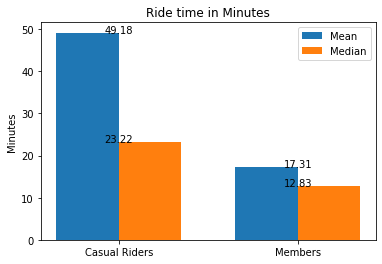

In [60]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['Casual Riders', 'Members']
y_mean = mean_data['ride_length']
y_median = median_data['ride_length']

x = np.arange(len(labels)) 
width = 0.35
plt.bar(x - width/2, y_mean, width, label='Mean')
plt.bar(x + width/2, y_median, width, label='Median')

plt.ylabel('Minutes')
plt.title('Ride time in Minutes')
plt.xticks(x, labels)
#plt.xticklabels(labels)
plt.legend()


def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha='center')
    
addlabels(x - width/2, y_mean)
addlabels(x+width/2, y_median)


    
plt.show()
    
   

Now, let's visualise the total number of riders in each day of Week, with members as the secondary index. 

<AxesSubplot:xlabel='day_of_week'>

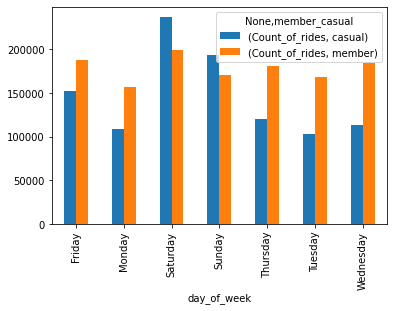

In [92]:
table_day = pd.pivot_table(cycle_df_cleaned,index='day_of_week', columns='member_casual',values=["ride_id"],aggfunc=len)
table_day = table_day.rename(columns={'ride_id': 'Count_of_rides'})
table_day.plot.bar(stacked=False)